# Import Library

In [1]:
import warnings
warnings.filterwarnings("ignore")

import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

from xgboost import XGBClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR, LinearSVC, NuSVR
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier, NearestCentroid, RadiusNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, HistGradientBoostingRegressor

# Load Data

In [2]:
data = pd.read_csv("..\Dataset\healthcare-dataset-stroke-data.csv").drop(columns=['id'])
data.sample(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
232,Female,73.0,0,0,Yes,Self-employed,Urban,70.94,34.4,never smoked,1
3517,Male,49.0,0,0,Yes,Private,Urban,193.87,41.0,Unknown,0
519,Male,10.0,0,0,No,children,Rural,108.79,21.0,Unknown,0
192,Male,59.0,0,0,Yes,Self-employed,Rural,118.03,35.5,smokes,1
4236,Female,31.0,0,0,Yes,Private,Urban,131.42,24.9,smokes,0


# Inital Analysis

In [61]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB
None


In [62]:
round(data.describe().transpose(), 2)

,count,mean,std,min,25%,50%,75%,max
age,5110.0,43.23,22.61,0.08,25.00,45.00,61.00,82.00
hypertension,5110.0,0.10,0.30,0.00,0.00,0.00,0.00,1.00
heart_disease,5110.0,0.05,0.23,0.00,0.00,0.00,0.00,1.00
avg_glucose_level,5110.0,106.15,45.28,55.12,77.24,91.88,114.09,271.74
bmi,4909.0,28.89,7.85,10.30,23.50,28.10,33.10,97.60
stroke,5110.0,0.05,0.22,0.00,0.00,0.00,0.00,1.00


In [63]:
data.describe(include=['object']).transpose()

,count,unique,top,freq
gender,5110,3,Female,2994
ever_married,5110,2,Yes,3353
work_type,5110,5,Private,2925
Residence_type,5110,2,Urban,2596
smoking_status,5110,4,never smoked,1892


In [64]:
data['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [57]:
data.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# Handle the Numerical and Categorical Columns

In [3]:
numerical_column = [column for column in data.columns if data[column].dtype != 'object']
print(numerical_column)
categorical_column = [column for column in data.columns if data[column].dtype == 'object']
print(categorical_column)

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']
['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


### Cleaning nan Value 

In [4]:
def set_numerical_nan(data, numerical_column):
    data[numerical_column] = data[numerical_column].fillna(data[numerical_column].mean())
    return data
data = set_numerical_nan(data, numerical_column)

In [6]:
def set_categorical_nan(data, categorical_column):
    imp = SimpleImputer(strategy="most_frequent")
    data[categorical_column] = imp.fit_transform(data[categorical_column])
    return data
data = set_categorical_nan(data, categorical_column)

In [7]:
data.drop(data[data['gender'] == 'Other'].index, inplace = True)

### Change the unit of Age from days to years

# Data Exploration

### Distribution value for numerical columns

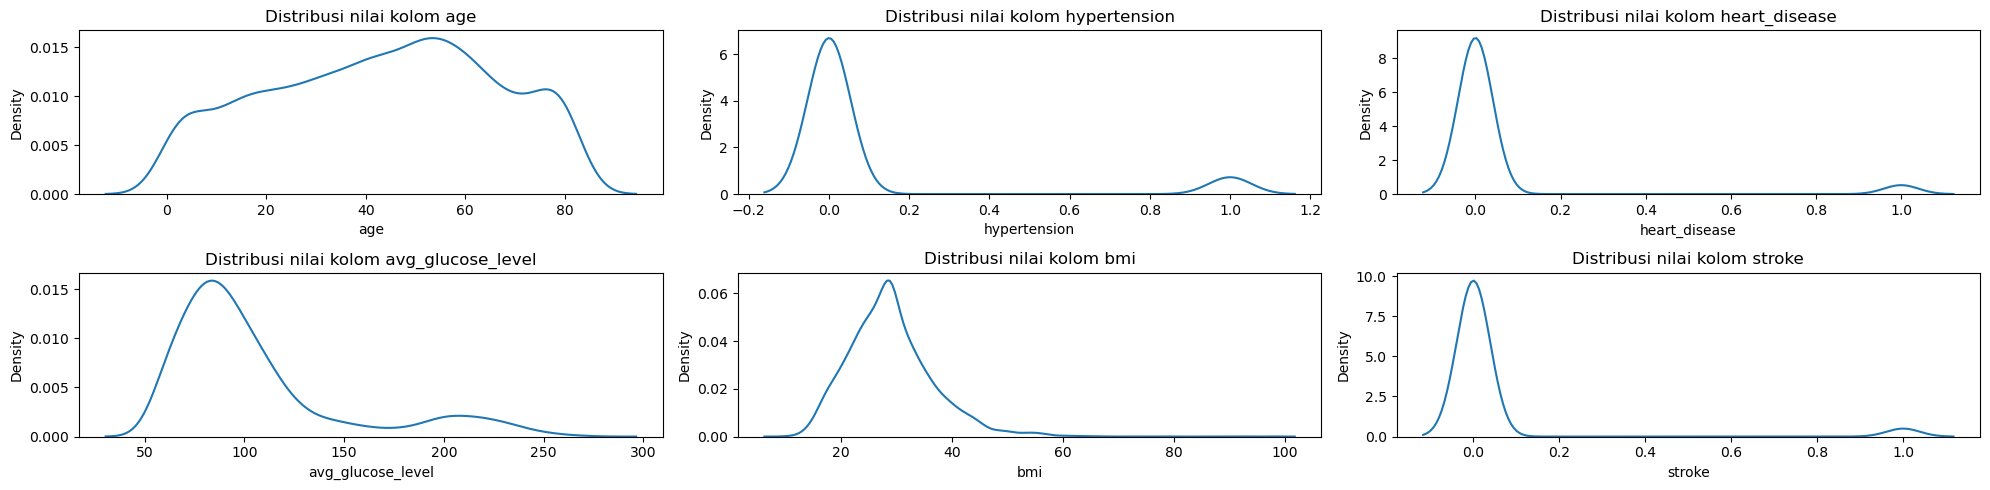

In [8]:
num_rows = 2
num_cols = math.ceil(len(numerical_column) / num_rows)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5))
for i, column in enumerate(numerical_column):
    row = i // num_cols
    col = i % num_cols
    sns.kdeplot(data, x=column, ax=axes[row, col]).set_title("Distribusi nilai kolom " + column)
    
for i in range(len(numerical_column), num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

### Distribution value for numerical columns based on Gender

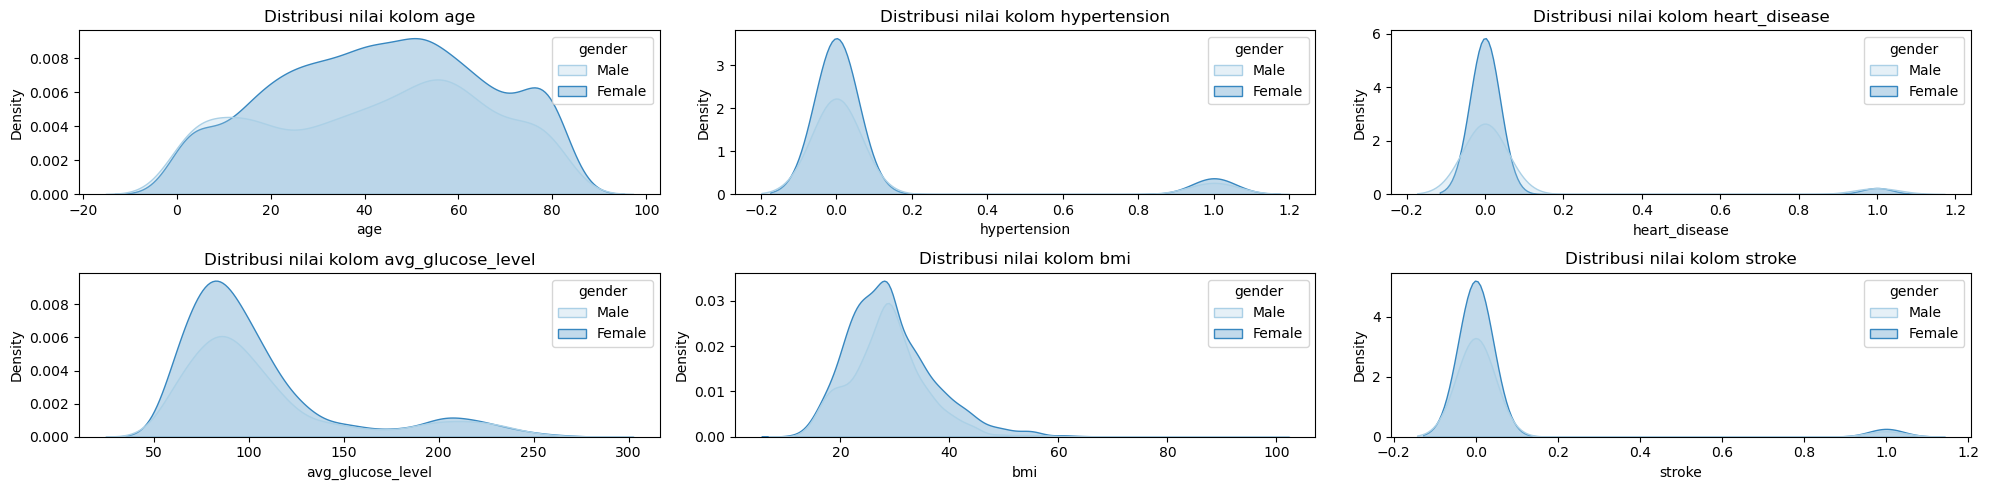

In [9]:
num_rows = 2
num_cols = math.ceil(len(numerical_column) / num_rows)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5))
for i, column in enumerate(numerical_column):
    row = i // num_cols
    col = i % num_cols
    sns.kdeplot(data, x=column, hue="gender", fill=True, alpha=.3, palette="Blues", ax=axes[row, col]).set_title("Distribusi nilai kolom " + column)
    
for i in range(len(numerical_column), num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

### Count of each value for categorical columns

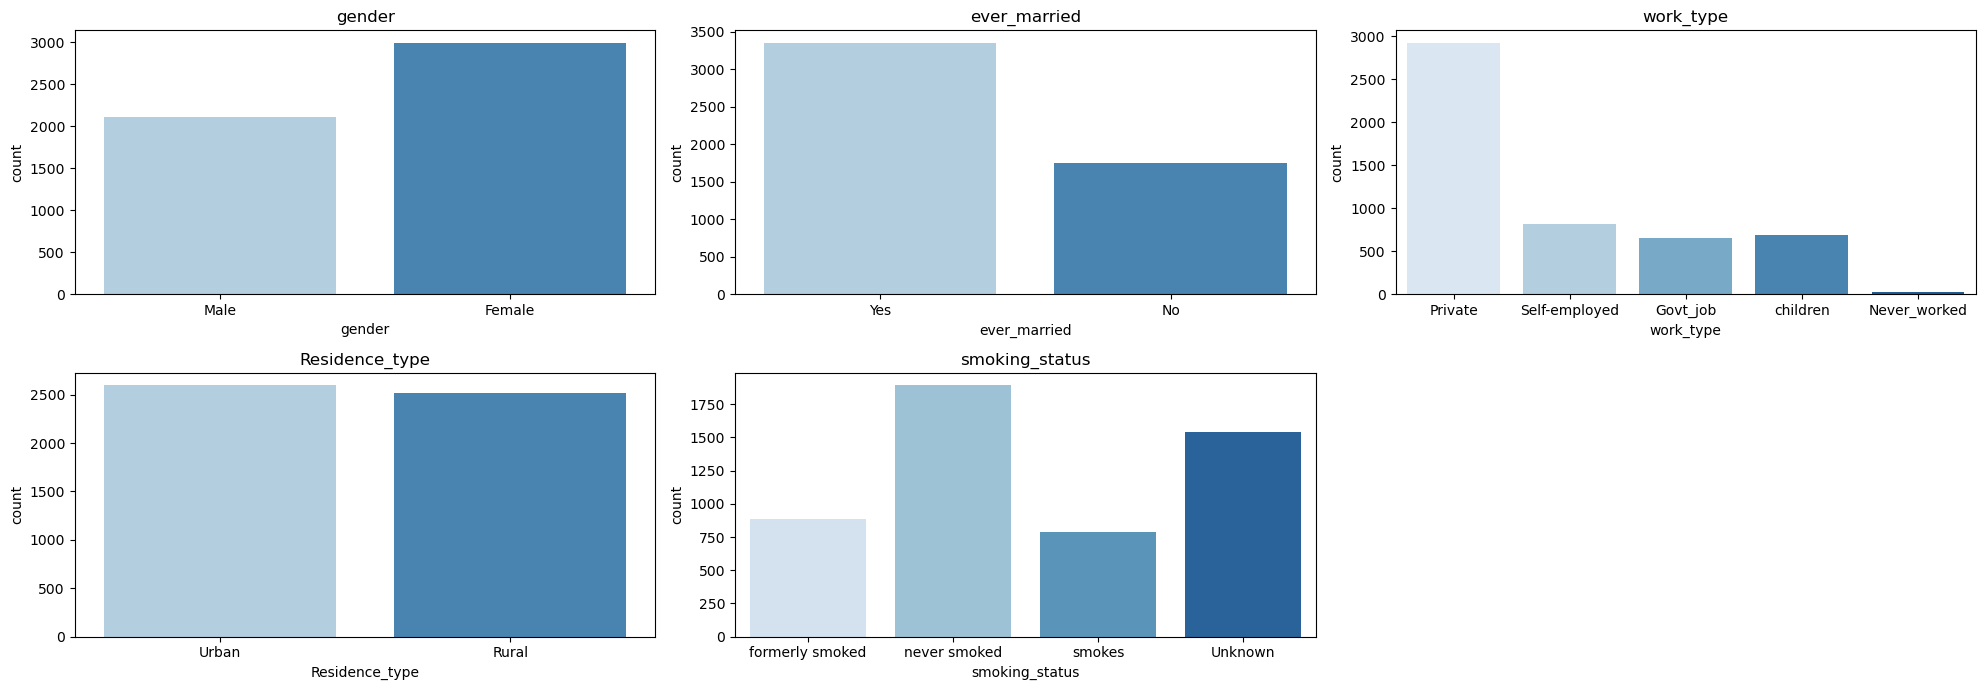

In [10]:
num_rows = 2
num_cols = math.ceil(len(categorical_column) / num_rows)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 7))
for i, column in enumerate(categorical_column):
    row = i // num_cols
    col = i % num_cols
    sns.countplot(x=data[column], ax=axes[row, col], palette="Blues").set_title(column)
    
    
for i in range(len(categorical_column), num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

### The range of values in the numerical column

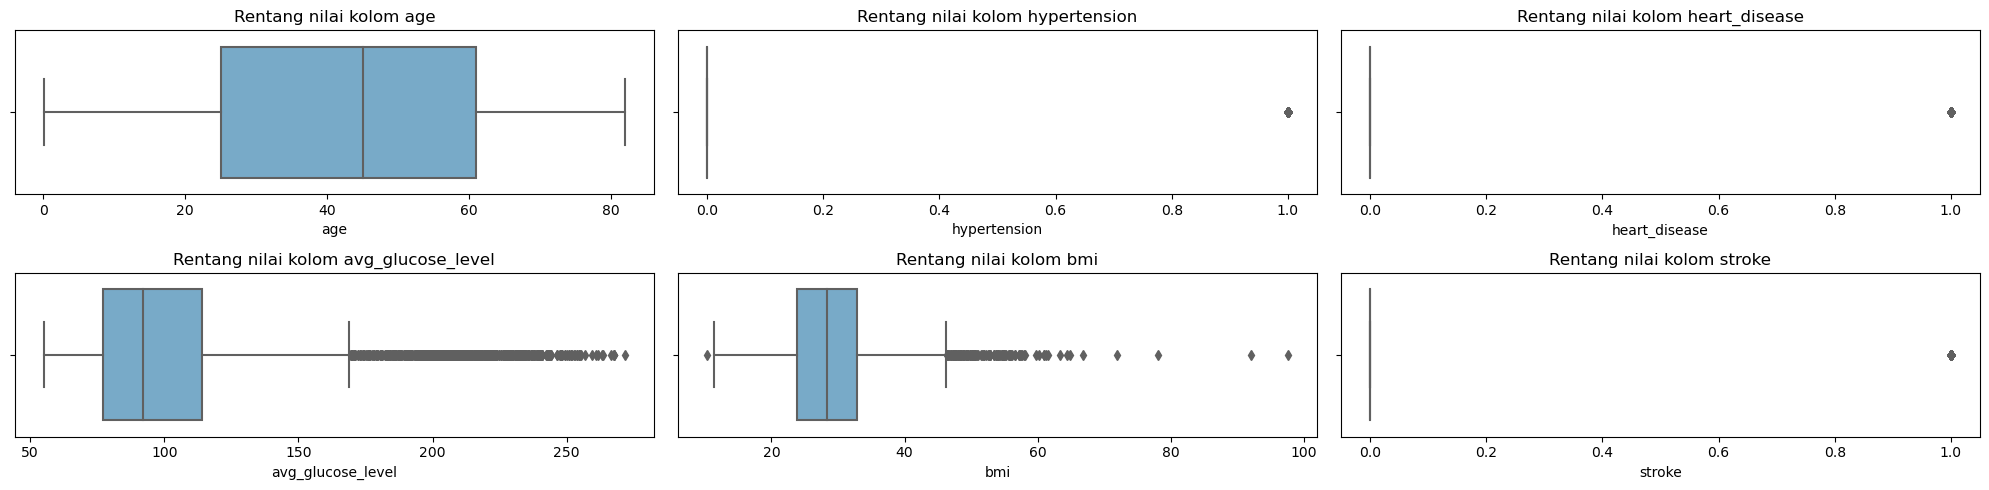

In [7]:
num_rows = 2
num_cols = math.ceil(len(numerical_column) / num_rows)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5))
for i, column in enumerate(numerical_column):
    row = i // num_cols
    col = i % num_cols
    sns.boxplot(x=data[column], ax=axes[row, col], palette="Blues").set_title("Rentang nilai kolom " + column)
    
for i in range(len(numerical_column), num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

### The range of values in ALL column

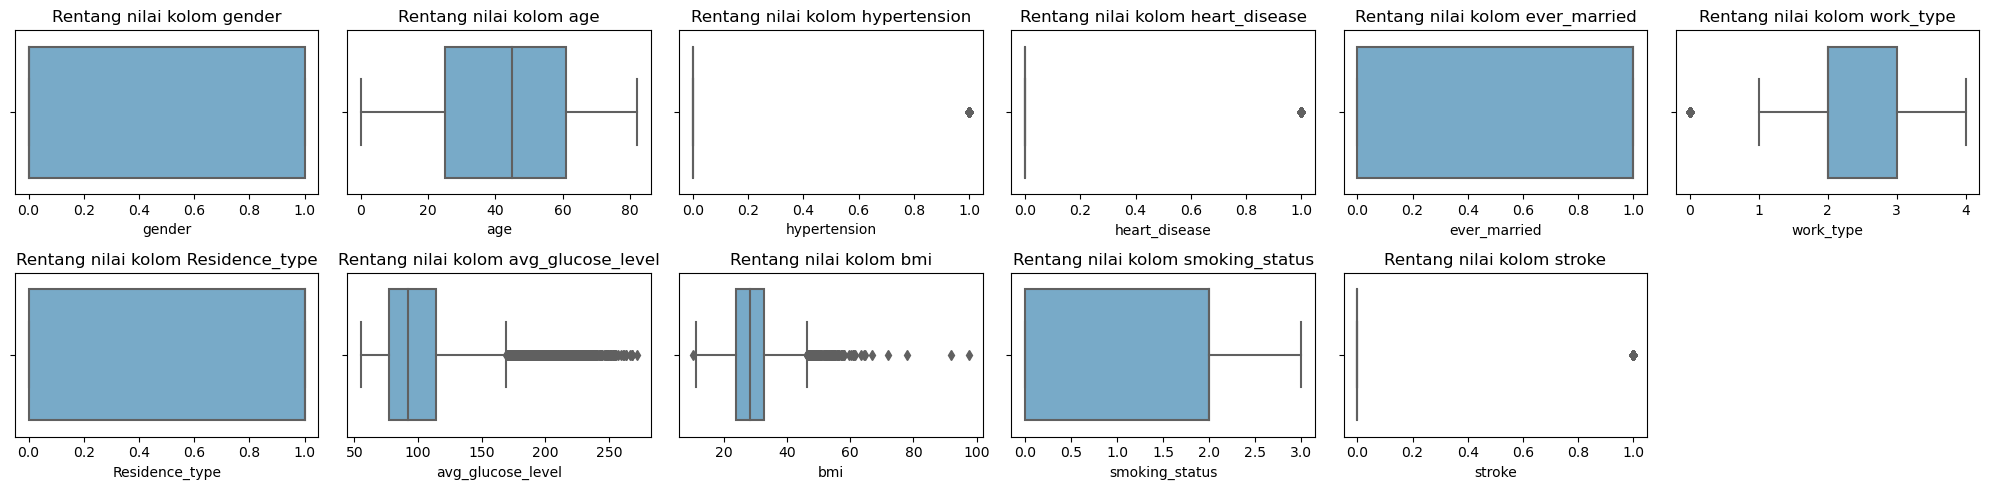

In [9]:
range_data = data.copy()

encoder = LabelEncoder()
for column in categorical_column:
    range_data[column] = encoder.fit_transform(range_data[column])

num_rows = 2
num_cols = math.ceil(len(range_data.columns) / num_rows)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5))
for i, column in enumerate(range_data.columns):
    row = i // num_cols
    col = i % num_cols
    sns.boxplot(x=range_data[column], ax=axes[row, col], palette="Blues").set_title("Rentang nilai kolom " + column)
    
for i in range(len(range_data.columns), num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

# Data correlation between columns

<Axes: >

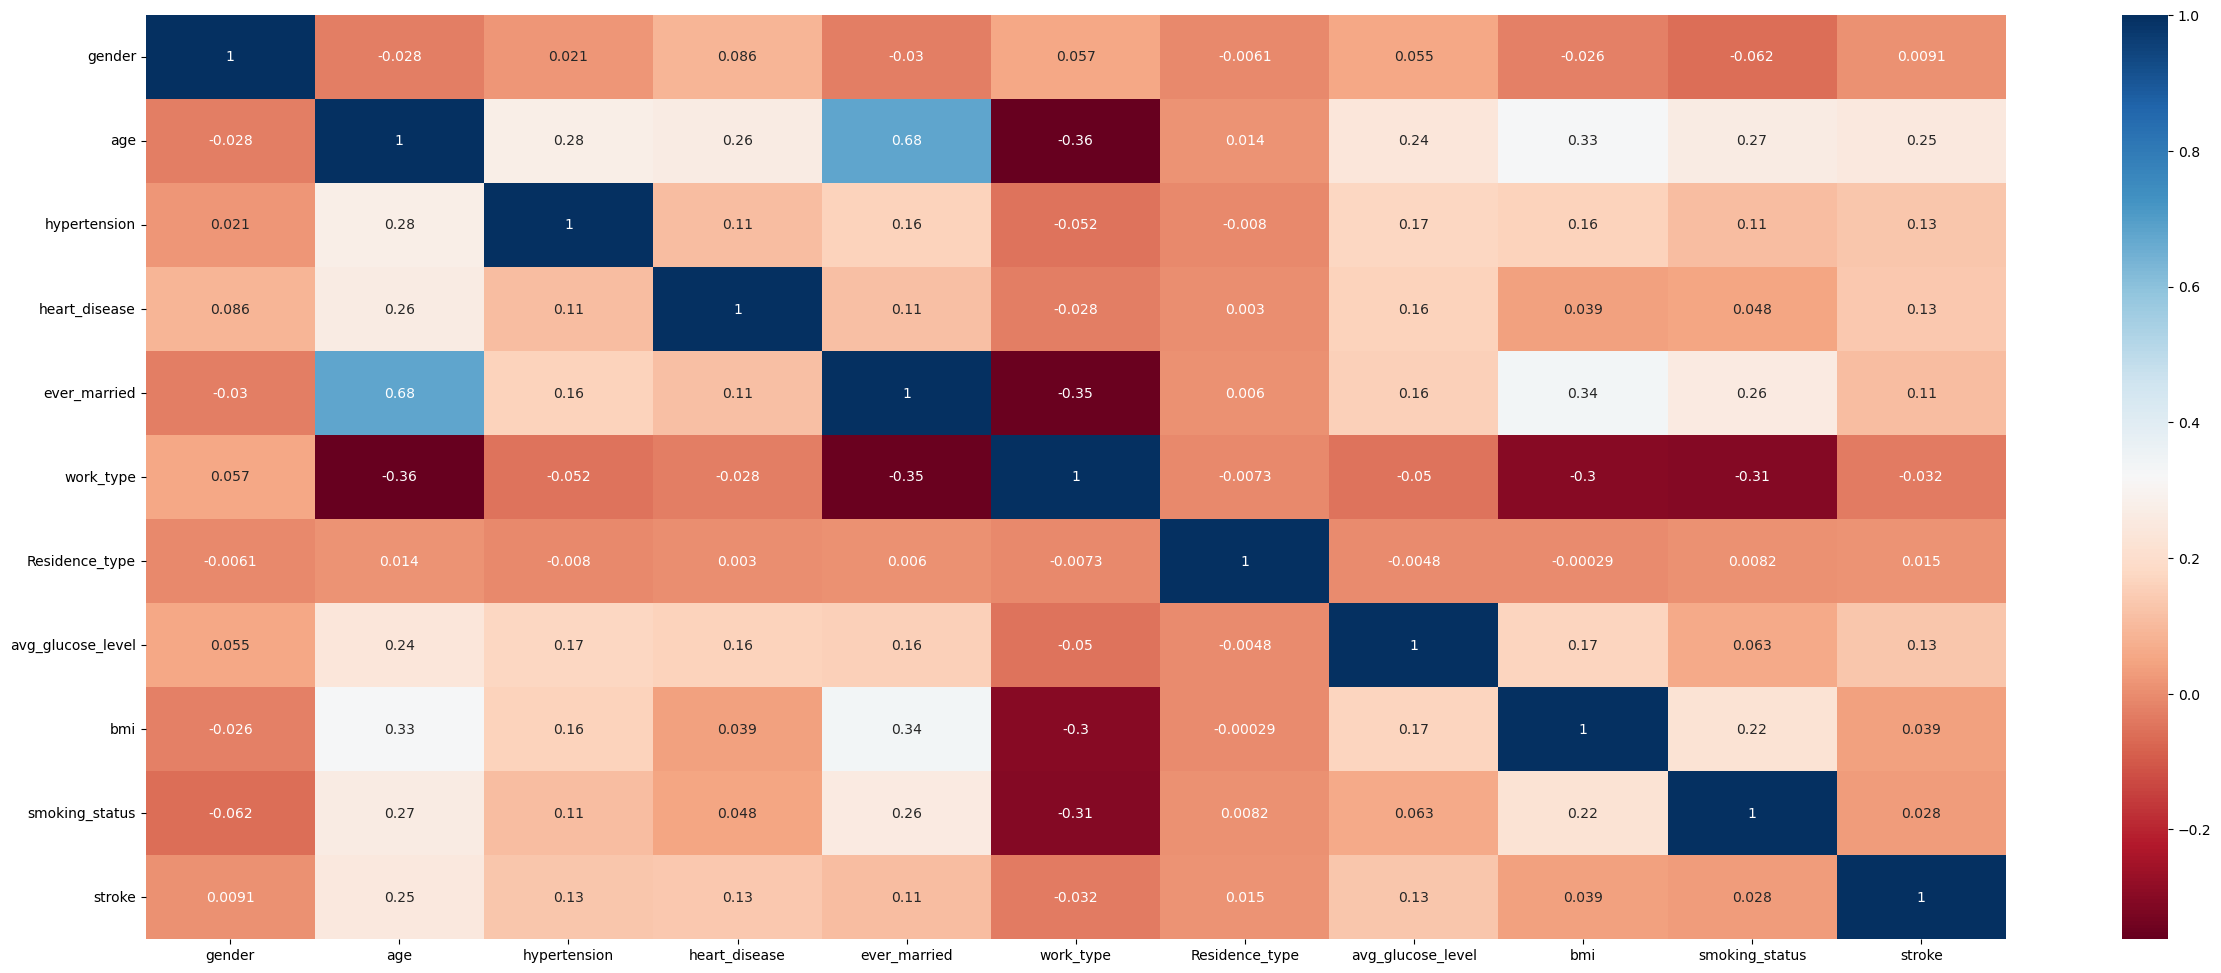

In [8]:
datacorr = data.copy()

encoder = LabelEncoder()
for column in categorical_column:
    datacorr[column] = encoder.fit_transform(datacorr[column])

plt.figure(figsize=(30,12))
corr = datacorr.corr()
sns.heatmap(corr, annot=True, cmap="RdBu")

# Data Preprocessing

In [8]:
data = pd.get_dummies(data, columns = categorical_column)

X = data.drop(columns=['stroke'])
Y = data['stroke'].astype('int8')

print(Counter(Y))

oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)
print(Counter(Y))

scaler = MinMaxScaler()
# scaler = StandardScaler()
X = scaler.fit_transform(X)

Counter({0: 4860, 1: 249})
Counter({1: 4860, 0: 4860})


### Split data to Train and Test data

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {(X_train.shape)}')
print(f'Total # of sample in test dataset: {(X_test.shape)}')

trans = PowerTransformer()
X_train = trans.fit_transform(X_train)
X_test = trans.transform(X_test)

Total # of sample in whole dataset: 9720
Total # of sample in train dataset: (7776, 20)
Total # of sample in test dataset: (1944, 20)


# Model Prediction

### Prepare Model

In [10]:
def algorithms():
    algorithms = [
                    ### Classification ###
                  ('KNN Class', KNeighborsClassifier(n_neighbors=2)),
                  ('Linear SVC',LinearSVC(random_state=42, tol=(1)/10)),
                  ('Random Forest Class',RandomForestClassifier(max_depth=13, random_state=42)),
                  ('XGBClassifier', XGBClassifier(n_estimators=81, max_depth=100, learning_rate=.1, objective='binary:logistic')),

                    #### Regression ###
                  ('Hist Gradient B Reg',HistGradientBoostingRegressor()),
                  ('KNN Reg', KNeighborsRegressor(n_neighbors=7)), 
                  ('MLP', MLPRegressor(hidden_layer_sizes=(1000,), max_iter=100, random_state=42)),
                  ('Nu SVR',NuSVR(C=1, nu=(2)/10)),
                  ('Random Forrest Reg', RandomForestRegressor(n_estimators=40, max_depth=50, random_state=42)),
                  ('SVR', SVR(kernel='rbf')), 
                  ]
    return algorithms

def prepare_model(algorithm):
    model = algorithm
    model.fit(X_train, y_train)
    return model

def calculate_performance(model, X_train, y_train, X_test, y_test):
    y_pred = model.predict(X_test)
    acc = round(model.score(X_train,y_train), 4)*100
    mse = round(mean_squared_error(y_test, y_pred), 2)
    r2  = round(r2_score(y_test, y_pred), 2)
    return acc, mse, r2

def regression_result(result, name, acc, mse, r2):
    result.append((name, acc, mse, r2))
    return result

### Training and Evaluate the model

In [11]:
%%time
result = []
trained_models = []

algorithms = algorithms()

for index, tup in tqdm(enumerate(algorithms)):
    model = prepare_model(tup[1])
    trained_models.append((tup[0],model))

    # Calculate the Accuracy, Mean Squared Error (MSE), and R-squared score
    acc, mse, r2= calculate_performance(model,X_train, y_train, X_test, y_test)
    result = regression_result(result, tup[0], acc, r2, mse)

regression_results_df = pd.DataFrame(result, columns=('Model Name', 'Accuracy', 'R-Square', 'MSE'))
regression_results_df.sort_values(by=['R-Square', 'Accuracy'], ascending=False)

10it [00:16,  1.69s/it]

CPU times: total: 51.5 s
Wall time: 16.9 s


,Model Name,Accuracy,R-Square,MSE
3,XGBClassifier,99.97,0.88,0.03
8,Random Forrest Reg,98.43,0.88,0.03
0,KNN Class,97.90,0.88,0.03
4,Hist Gradient B Reg,92.79,0.88,0.03
5,KNN Reg,90.87,0.88,0.03
2,Random Forest Class,99.43,0.87,0.03
6,MLP,93.62,0.87,0.03
7,Nu SVR,88.75,0.86,0.03
9,SVR,88.28,0.86,0.04
1,Linear SVC,95.91,0.83,0.04


### Find optimal hyperparameter for some models

In [14]:
plot_r2 = []

max_value = 0
num_value = 0

start_num = 1
n_number = 1000

for i in tqdm(range(start_num, n_number+1)):
    

    ### Classification ###
    # model = AdaBoostClassifier(n_estimators=i, learning_rate=0.1, random_state=42)
    # model = GradientBoostingClassifier(n_estimators=i, learning_rate=0.1, max_depth=50, random_state=42)
    # model = KNeighborsClassifier(n_neighbors=i)
    # model = LinearSVC(random_state=42, tol=(i)/1000)
    # model = RandomForestClassifier(max_depth=i, random_state=42)
    # model = SGDClassifier(max_iter=i,loss='hinge', penalty='l2', alpha=1e-3, random_state=42,  tol=None)
    # model = XGBClassifier(n_estimators=i, max_depth=100, learning_rate=.1, objective='binary:logistic')
    
    ### Regression ###
    # model = AdaBoostRegressor( n_estimators=i, random_state=42)
    # model = DecisionTreeRegressor(max_depth=i)
    # model = GradientBoostingRegressor(n_estimators=i, learning_rate=0.1, max_depth=50, random_state=42)
    # model = KernelRidge(alpha=(i)/10)
    # model = KNeighborsRegressor(n_neighbors=i)
    # model = Lars(n_nonzero_coefs=i)
    # model = LarsCV(cv=i)
    # model = Lasso(alpha=(i)/1000)
    # model = LassoCV(cv=i, random_state=42)
    # model = LassoLars(alpha=(i)/10000)
    # model = LassoLarsCV(cv=i)
    # model = LogisticRegressionCV(cv=i, random_state=42)
    # model = LinearSVR(random_state=42, tol=(i)/100)
    # model = NuSVR(C=1, nu=(i)/10)
    # model = OrthogonalMatchingPursuitCV(cv=i)
    # model = PassiveAggressiveRegressor(max_iter=i, random_state=42, tol=1e-3)
    # model = RandomForestRegressor(n_estimators=i, max_depth=100, random_state=42)
    # model = Ridge(alpha=(i)/10)
    # model = SGDRegressor(max_iter=i, tol=1e-4, random_state=42)
    # model = TweedieRegressor(power = i)
    
    model.fit(X_train, y_train)
    # Calculate the R-squared score
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    plot_r2.append(r2)
    if (round(r2, 3)> max_value):
        max_value = round(r2, 3)
        num_value = i
    
print(max_value)
print(num_value)

plt.figure(figsize=(10,3))
plt.plot(plot_r2)
plt.show()

 15%|█▌        | 152/1000 [02:25<22:53,  1.62s/it]